In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#id 변수 모두 character처리
transaction = pd.read_csv('C:/Users/wjssm/Desktop/kaggle/Elo_Merchant_Category_Recommendation/data/historical_transactions.csv',
                         dtype = {'city_id':np.str, 'merchant_category_id':np.str, 
                                  'merchant_id':np.str,'state_id':np.str, 'subsector_id':np.str})
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
transaction.shape

(29112361, 14)

In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 object
category_1              object
installments            int64
category_3              object
merchant_category_id    object
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                object
subsector_id            object
dtypes: float64(2), int64(2), object(10)
memory usage: 3.0+ GB


In [11]:
transaction.describe()

,installments,month_lag,purchase_amount,category_2
count,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07
mean,6.484954e-01,-4.487294e+00,3.640090e-02,2.194578e+00
std,2.795577e+00,3.588800e+00,1.123522e+03,1.531896e+00
min,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00
25%,0.000000e+00,-7.000000e+00,-7.203559e-01,1.000000e+00
50%,0.000000e+00,-4.000000e+00,-6.883495e-01,1.000000e+00
75%,1.000000e+00,-2.000000e+00,-6.032543e-01,3.000000e+00
max,9.990000e+02,0.000000e+00,6.010604e+06,5.000000e+00


In [12]:
transaction.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

## 1.card_id
- Card identifier

In [18]:
#card_id unique 개수
len(transaction['card_id'].unique())

325540

In [19]:
#card_id 당 평균 거래 수
transaction['card_id'].value_counts().mean()

89.42790747680776

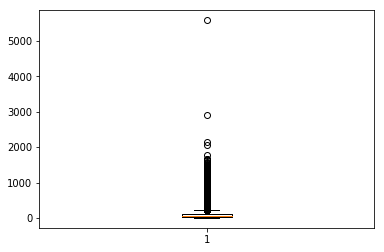

In [25]:
#card_id 별 거래건수에 대한 boxplot
plt.boxplot(transaction['card_id'].value_counts().values)
plt.show()

(array([3.23096e+05, 2.35300e+03, 8.60000e+01, 3.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.000e+00, 5.600e+02, 1.118e+03, 1.676e+03, 2.234e+03, 2.792e+03,
        3.350e+03, 3.908e+03, 4.466e+03, 5.024e+03, 5.582e+03]),
 <a list of 10 Patch objects>)

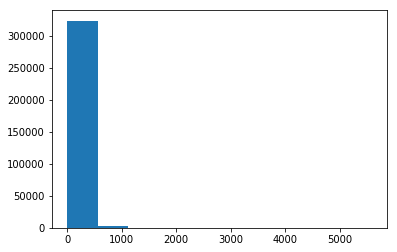

In [24]:
#card_id 별 거래건수에 대한 boxplot
plt.hist(transaction['card_id'].value_counts().values,)

## 2. month_lag
- month lag to reference date

(array([1481070., 1007878., 1085053., 2662570., 1769844., 2050048.,
        5004595., 3095651., 3857276., 7098376.]),
 array([-13. , -11.7, -10.4,  -9.1,  -7.8,  -6.5,  -5.2,  -3.9,  -2.6,
         -1.3,   0. ]),
 <a list of 10 Patch objects>)

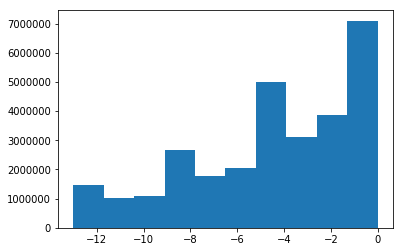

In [27]:
plt.hist(transaction['month_lag'])

{'whiskers': [<matplotlib.lines.Line2D at 0x292edff77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x292ee017d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x292ee017390>],
 'medians': [<matplotlib.lines.Line2D at 0x292ee01a6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292ee01ab00>],
 'means': []}

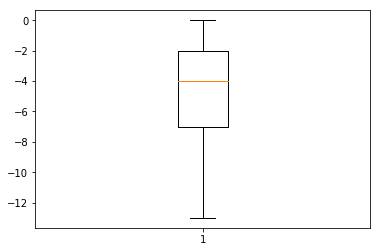

In [26]:
plt.boxplot(transaction['month_lag'])

## 3. purchase_date

In [35]:
transaction['year'] = pd.DatetimeIndex(transaction['purchase_date']).year
transaction['month'] = pd.DatetimeIndex(transaction['purchase_date']).month
#월급날이나 월말, 월초인지 관련 있지 않을까?
transaction['day'] = pd.DatetimeIndex(transaction['purchase_date']).day
transaction['hour'] = pd.DatetimeIndex(transaction['purchase_date']).hour

#### year

In [36]:
#연별 거래 수의 평균
transaction['year'].value_counts().mean()

14556180.5

In [40]:
transaction['year'].value_counts()

2017    23828069
2018     5284292
Name: year, dtype: int64

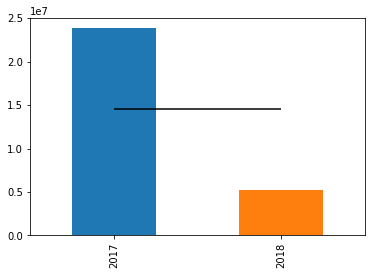

In [59]:
transaction['year'].value_counts().plot('bar')
plt.hlines(y = 14556180.5, xmin = 0, xmax = 1)

#### month

In [45]:
#월별 거래 수의 평균
transaction['month'].value_counts().mean()

2426030.0833333335

In [52]:
transaction['month'].value_counts()

1     4001250
2     3637012
12    3410087
11    2827227
10    2509176
9     2398778
8     2203331
7     2016386
6     1675260
5     1540998
3     1455293
4     1437563
Name: month, dtype: int64

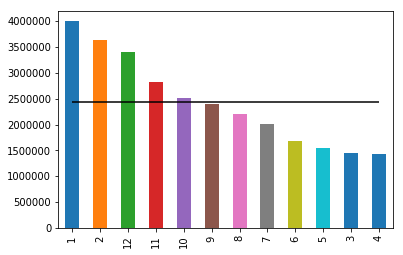

In [60]:
transaction['month'].value_counts().plot('bar')
plt.hlines(y = transaction['month'].value_counts().mean(), xmin = 0, xmax = 11)

#### day

In [61]:
#일별 거래 수의 평균
transaction['day'].value_counts().mean()

939108.4193548387

In [62]:
transaction['day'].value_counts()

20    1037353
22    1014884
6     1004742
16    1003939
21    1002037
9      997030
13     993661
23     992629
17     989820
18     986524
15     984205
7      983373
27     982192
11     982013
10     967070
14     967033
24     960544
28     959408
26     951095
8      941187
5      936998
19     922182
4      920578
2      914948
12     910415
25     904527
1      856717
3      853382
29     852783
30     788152
31     550940
Name: day, dtype: int64

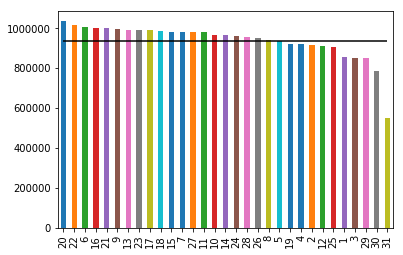

In [64]:
transaction['day'].value_counts().plot('bar')
plt.hlines(y = transaction['day'].value_counts().mean(), xmin = 0, xmax = 30)

#### hour

In [65]:
#시간별 거래 수의 평균
transaction['hour'].value_counts().mean()

1213015.0416666667

In [66]:
transaction['hour'].value_counts()

13    2136786
12    2119599
15    2055245
14    2042870
16    2039291
17    2032684
18    1976501
11    1833164
19    1831153
20    1655062
10    1503421
21    1392813
0     1275458
9     1133893
22    1034842
8      778985
23     726836
7      446702
1      301777
6      229308
2      206033
3      134919
5      126470
4       98549
Name: hour, dtype: int64

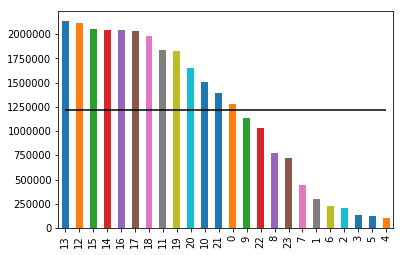

In [68]:
transaction['hour'].value_counts().plot('bar')
plt.hlines(y = transaction['hour'].value_counts().mean(), xmin = 0, xmax = 23)

## 2. authorized_flag
- Y' if approved, 'N' if denied

In [69]:
transaction['authorized_flag'].value_counts()

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date

## 2. month_lag
- month lag to reference date